<a href="https://colab.research.google.com/github/DobiIsFree/gongboohater/blob/main/HW03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Prepare Datasets

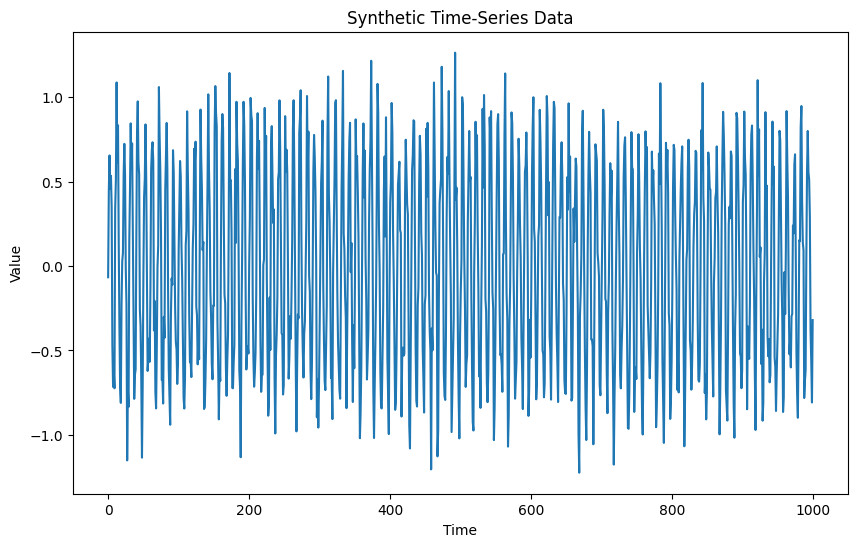

In [35]:
data_len = 1000
time = np.arange(0, data_len)

# Generate sinusoidal data
amplitude = 0.8
frequency = 0.1
sinusoid = amplitude * np.sin(2 * np.pi * frequency * time)

# Add noise
noise_amplitude = 0.2
noise = np.random.normal(scale=noise_amplitude, size=data_len)
data = sinusoid + noise

# Plot the time-series data
plt.figure(figsize=(10, 6))
plt.plot(time, data)
plt.title("Synthetic Time-Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

In [36]:
data_matrix = []
seq_len = 3

for i in range(0, data_len-seq_len):
  tmp_data = data[i: i+seq_len+1]
  data_matrix.append(tmp_data)

data_matrix_np = np.array(data_matrix)
print(data_matrix_np.shape)
print(data_matrix_np)

(997, 4)
[[-0.06657208  0.45155083  0.65497879  0.45795115]
 [ 0.45155083  0.65497879  0.45795115  0.53454684]
 [ 0.65497879  0.45795115  0.53454684  0.35098661]
 ...
 [ 0.51150056  0.29243919 -0.38050105 -0.56844778]
 [ 0.29243919 -0.38050105 -0.56844778 -0.80824761]
 [-0.38050105 -0.56844778 -0.80824761 -0.32024815]]


In [37]:
x = data_matrix_np[:, 0:seq_len]
y = data_matrix_np[:, seq_len]
print(x.shape)
print(y.shape)

n_train_data = 750

x_train = x[0:n_train_data, :]
y_train = y[0:n_train_data]
x_test = x[n_train_data:x.shape[0], :]
y_test = y[n_train_data:y.shape[0]]

(997, 3)
(997,)


In [38]:
from keras import layers, models

input_shape = (seq_len, )

mlp_seq = models.Sequential()
mlp_seq.add(layers.Dense(units = 5, activation = 'tanh', input_shape=input_shape))
mlp_seq.add(layers.Dense(units = 10, activation = 'tanh'))
mlp_seq.add(layers.Dense(units = 1, activation = 'linear'))

mlp_seq.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_squared_error'])
mlp_seq.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 20        
                                                                 
 dense_4 (Dense)             (None, 10)                60        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = mlp_seq.fit(x_train, y_train,
                      validation_data = [x_test, y_test], batch_size=16, epochs=100)

Epoch 1/100
47/47 [==============================] - 1s 7ms/step - loss: 0.2770 - mean_squared_error: 0.2770 - val_loss: 0.1992 - val_mean_squared_error: 0.1992
Epoch 2/100
47/47 [==============================] - 0s 5ms/step - loss: 0.1751 - mean_squared_error: 0.1751 - val_loss: 0.1155 - val_mean_squared_error: 0.1155
Epoch 3/100
47/47 [==============================] - 0s 4ms/step - loss: 0.1106 - mean_squared_error: 0.1106 - val_loss: 0.0792 - val_mean_squared_error: 0.0792
Epoch 4/100
47/47 [==============================] - 0s 6ms/step - loss: 0.0934 - mean_squared_error: 0.0934 - val_loss: 0.0758 - val_mean_squared_error: 0.0758
Epoch 5/100
47/47 [==============================] - 0s 6ms/step - loss: 0.0917 - mean_squared_error: 0.0917 - val_loss: 0.0757 - val_mean_squared_error: 0.0757
Epoch 6/100
47/47 [==============================] - 0s 6ms/step - loss: 0.0923 - mean_squared_error: 0.0923 - val_loss: 0.0757 - val_mean_squared_error: 0.0757
Epoch 7/100
47/47 [===============

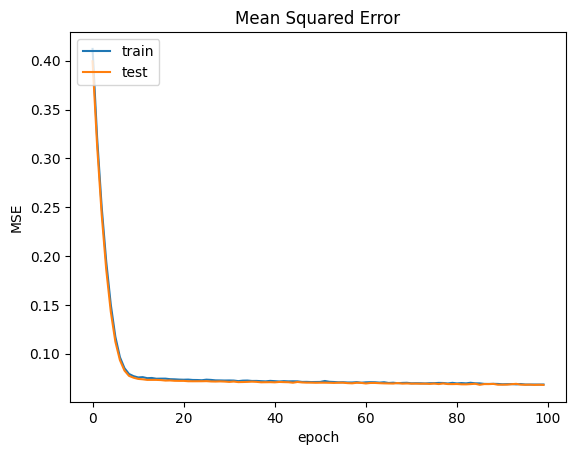

In [33]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

8/8 [==============================] - 0s 2ms/step


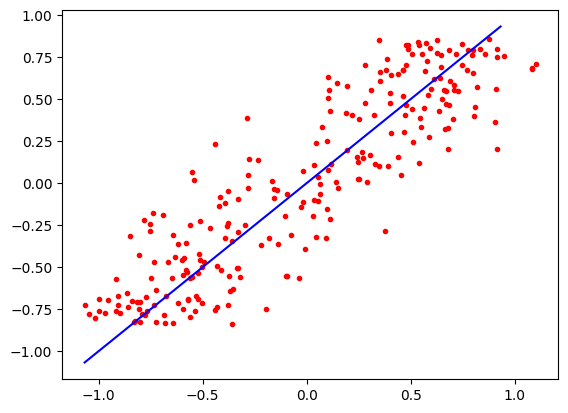

In [40]:
plt.plot(y_test, mlp_seq.predict(x_test), 'r.')
plt.plot(np.arange(min(y_test), max(y_test)), np.arange(min(y_test), max(y_test)), 'b')
plt.show()

8/8 [==============================] - 0s 4ms/step


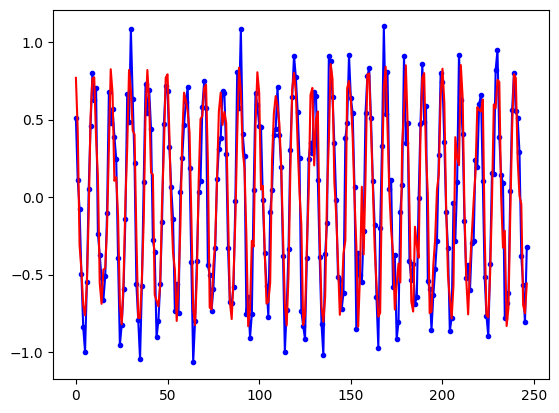

In [41]:
plt.plot(range(y_test.shape[0]), y_test, 'b.-')
plt.plot(range(y_test.shape[0]), mlp_seq.predict(x_test), 'r-')
plt.show()

##LSTM

In [42]:
rnn_sequence_len = 4
data_dim = 3

x = data_matrix_np[0:data_matrix_np.shape[0]-1, 0:data_dim]
y = data_matrix_np[0:data_matrix_np.shape[0]-1, data_dim]

print(x.shape)
print(y.shape)

x = np.reshape(x, (-1, rnn_sequence_len, data_dim))
y = np.reshape(y, (-1, rnn_sequence_len, 1))
print(x.shape)
print(y.shape)

(996, 3)
(996,)
(249, 4, 3)
(249, 4, 1)


In [43]:
n_train_data = 200

x_train = x[0:n_train_data, :]
y_train = y[0:n_train_data]
x_test = x[n_train_data:x.shape[0], :]
y_test = y[n_train_data:y.shape[0]]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(200, 4, 3)
(49, 4, 3)
(200, 4, 1)
(49, 4, 1)


In [44]:
input_shape = (x_train[0].shape)

input = layers.Input(input_shape)
rnn_layer = layers.LSTM(10, return_sequences=True)(input)
output= layers.TimeDistributed(layers.Dense(1, activation='linear'))(rnn_layer)

rnn_func = models.Model(input, output)

rnn_func.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_squared_error'])
rnn_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 3)]            0         
                                                                 
 lstm (LSTM)                 (None, 4, 10)             560       
                                                                 
 time_distributed (TimeDistr  (None, 4, 1)             11        
 ibuted)                                                         
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [45]:
history = rnn_func.fit(x_train, y_train,
                        validation_data=[x_test, y_test], batch_size=16, epochs=100)

Epoch 1/100
13/13 [==============================] - 5s 46ms/step - loss: 0.3944 - mean_squared_error: 0.3944 - val_loss: 0.3423 - val_mean_squared_error: 0.3423
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.3662 - mean_squared_error: 0.3662 - val_loss: 0.3184 - val_mean_squared_error: 0.3184
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.3407 - mean_squared_error: 0.3407 - val_loss: 0.2959 - val_mean_squared_error: 0.2959
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.3167 - mean_squared_error: 0.3167 - val_loss: 0.2749 - val_mean_squared_error: 0.2749
Epoch 5/100
13/13 [==============================] - 0s 8ms/step - loss: 0.2940 - mean_squared_error: 0.2940 - val_loss: 0.2547 - val_mean_squared_error: 0.2547
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 0.2720 - mean_squared_error: 0.2720 - val_loss: 0.2350 - val_mean_squared_error: 0.2350
Epoch 7/100
13/13 [==============

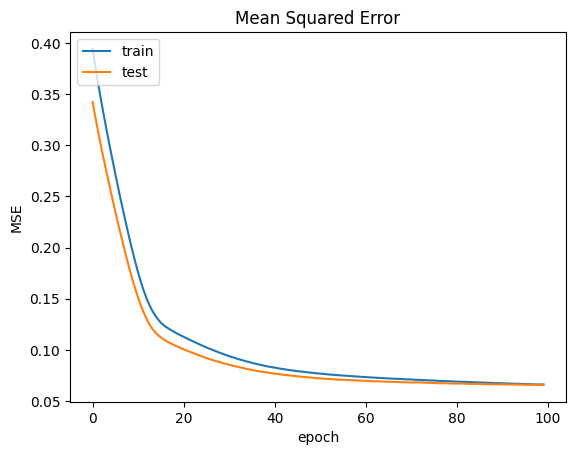

In [46]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

2/2 [==============================] - 0s 8ms/step


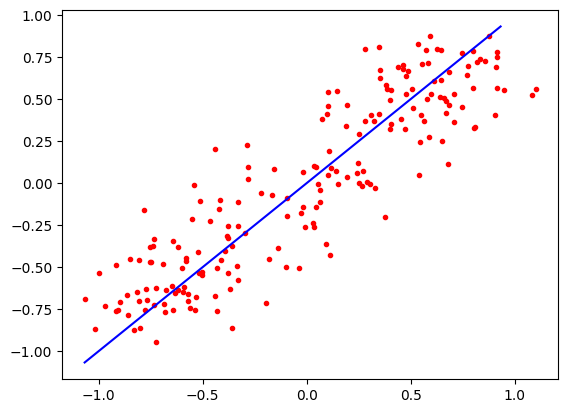

In [47]:
y_test_reshape = np.reshape(y_test, (-1, 1))
plt.plot(y_test_reshape, np.reshape(rnn_func.predict(x_test), (-1,1)), 'r.')
plt.plot(np.arange(min(y_test_reshape), max(y_test_reshape)),
         np.arange(min(y_test_reshape), max(y_test_reshape)), 'b')
plt.show()

2/2 [==============================] - 0s 5ms/step


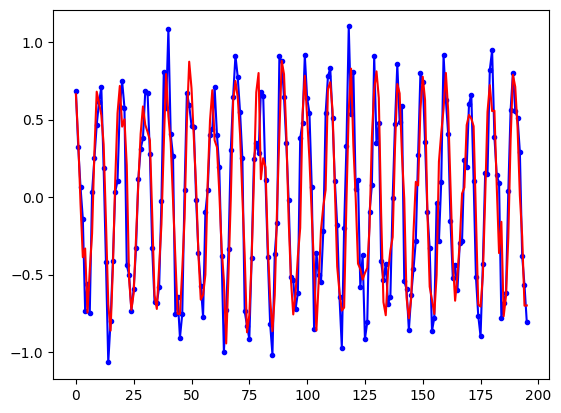

In [48]:
plt.plot(range(y_test_reshape.shape[0]), y_test_reshape, 'b.-')
plt.plot(range(y_test_reshape.shape[0]), np.reshape(rnn_func.predict(x_test), (-1, 1)), 'r-')
plt.show()